# Excercise 05 NEURONAL NETWORKS
## Camilo E. Prada Ladino
## 201021153

# 4.1 Little Red Riding Hood Network

In [84]:

import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons
import keras

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()

model.add(Dense(units=20, input_dim=2))
model.add(Activation('relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

# 4.2 Boston House Price Prediction

In [63]:
import pandas as pd

from sklearn.datasets import load_boston
boston_data = load_boston()

df = pd.DataFrame(boston_data['data'], columns=boston_data['feature_names'])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [66]:
df['MEDV']=boston_data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [67]:
print(df.keys())

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [68]:
df['CRIM'].describe()

count    506.000000
mean       3.593761
std        8.596783
min        0.006320
25%        0.082045
50%        0.256510
75%        3.647423
max       88.976200
Name: CRIM, dtype: float64

In [69]:
df['ZN'].describe()

count    506.000000
mean      11.363636
std       23.322453
min        0.000000
25%        0.000000
50%        0.000000
75%       12.500000
max      100.000000
Name: ZN, dtype: float64

In [70]:
df['INDUS'].describe()

count    506.000000
mean      11.136779
std        6.860353
min        0.460000
25%        5.190000
50%        9.690000
75%       18.100000
max       27.740000
Name: INDUS, dtype: float64

In [71]:
df['CHAS'].describe()

count    506.000000
mean       0.069170
std        0.253994
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

In [72]:
df['NOX'].describe()

count    506.000000
mean       0.554695
std        0.115878
min        0.385000
25%        0.449000
50%        0.538000
75%        0.624000
max        0.871000
Name: NOX, dtype: float64

In [73]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [74]:
df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [75]:
df['DIS'].describe()

count    506.000000
mean       3.795043
std        2.105710
min        1.129600
25%        2.100175
50%        3.207450
75%        5.188425
max       12.126500
Name: DIS, dtype: float64

In [56]:
df_2['RAD'].describe()

count    506.000000
mean       9.549407
std        8.707259
min        1.000000
25%        4.000000
50%        5.000000
75%       24.000000
max       24.000000
Name: RAD, dtype: float64

In [76]:
df['TAX'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: TAX, dtype: float64

In [77]:
df['PTRATIO'].describe()

count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: PTRATIO, dtype: float64

In [78]:
df['B'].describe()

count    506.000000
mean     356.674032
std       91.294864
min        0.320000
25%      375.377500
50%      391.440000
75%      396.225000
max      396.900000
Name: B, dtype: float64

In [79]:
df['LSTAT'].describe()

count    506.000000
mean      12.653063
std        7.141062
min        1.730000
25%        6.950000
50%       11.360000
75%       16.955000
max       37.970000
Name: LSTAT, dtype: float64

# 4.3 Feature analysis:

In [106]:
df1=df[['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE', 'MEDV']]
df1.head()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7
3,2.94,2.18,0.458,6.998,45.8,33.4
4,5.33,2.18,0.458,7.147,54.2,36.2


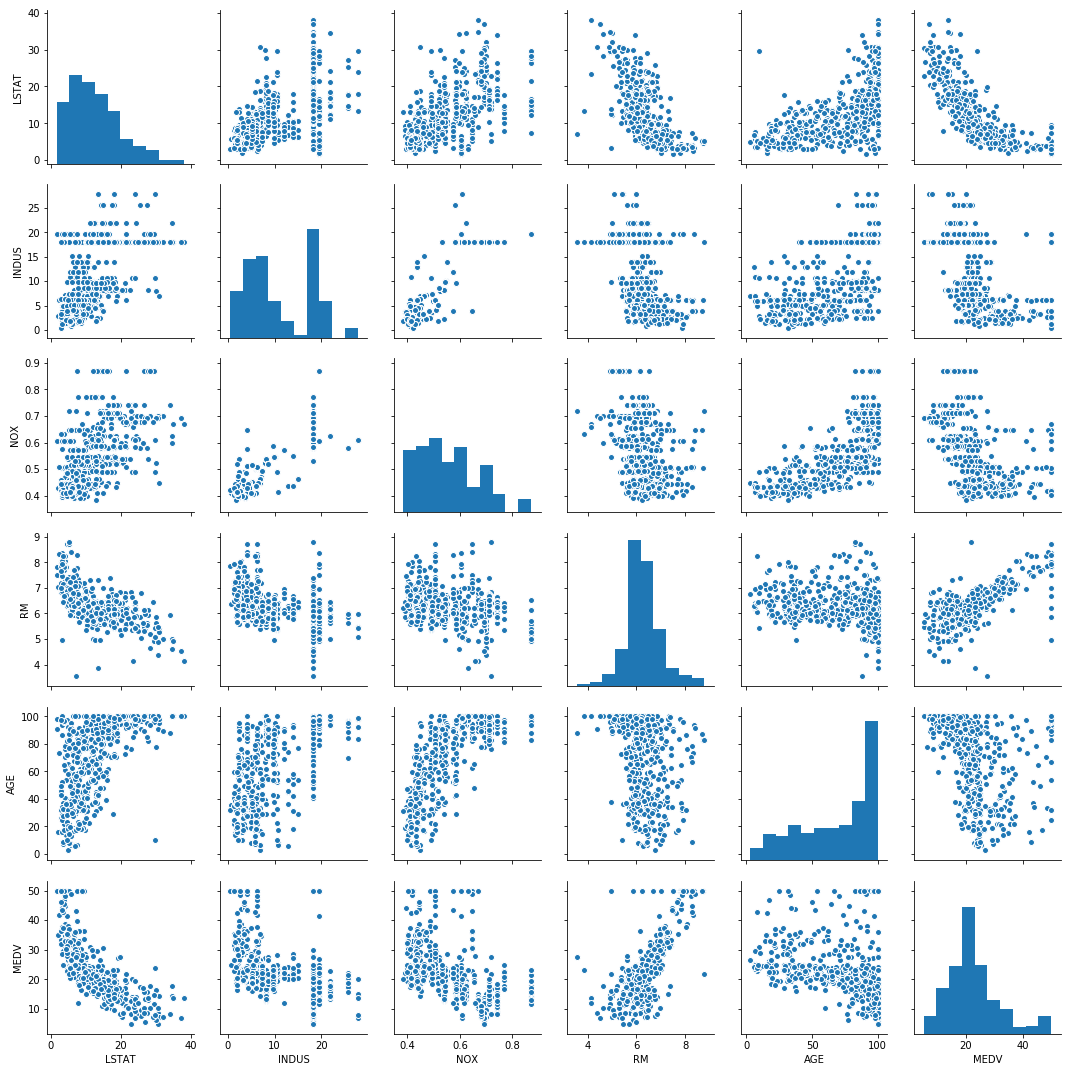

In [93]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure()
sns.pairplot(data=df[["LSTAT","INDUS","NOX","RM","AGE","MEDV"]], dropna=True)
plt.savefig("1_seaborn_pair_plot.png")

In [108]:
np.corrcoef(df1)

array([[1.        , 0.99075004, 0.97819441, ..., 0.98581972, 0.98307924,
        0.95808787],
       [0.99075004, 1.        , 0.94982287, ..., 0.99668853, 0.99682335,
        0.98682013],
       [0.97819441, 0.94982287, 1.        , ..., 0.94907484, 0.942261  ,
        0.89591008],
       ...,
       [0.98581972, 0.99668853, 0.94907484, ..., 1.        , 0.99973225,
        0.98987793],
       [0.98307924, 0.99682335, 0.942261  , ..., 0.99973225, 1.        ,
        0.99280619],
       [0.95808787, 0.98682013, 0.89591008, ..., 0.98987793, 0.99280619,
        1.        ]])

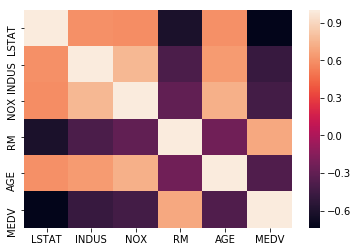

In [109]:
corr = df1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Las variables que tienen mejor correlación son NOX con INDUS, NOX con AGE, y MEDV
con RM

# 4.4 Modeling linear and non linear relationships

In [110]:
D1 = df1[['RM', 'MEDV']]
D2 = df1[['LSTAT','MEDV']]

In [122]:
pf = pd.DataFrame(np.random.randn(506, 2))
msk = np.random.rand(len(D1)) < 0.7
D1train = D1[msk]
D1test = D1[~msk]

In [123]:
pf = pd.DataFrame(np.random.randn(506, 2))
msk = np.random.rand(len(D2)) < 0.7
D2train = D2[msk]
D2test = D2[~msk]

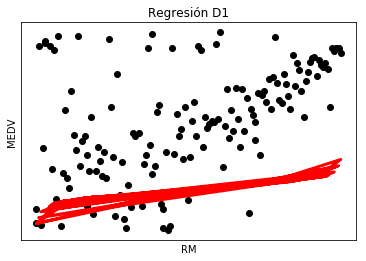

Coefficients: 
 [[8.78578908]]
Mean squared error: 40.35
Variance score: 0.51


In [142]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

D1trainX =D1train[['RM']]
D1trainY =D1train[['MEDV']]
D1testX =D1test[['RM']]
D1testY =D1test[['MEDV']]

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(D1trainX,D1trainY)
 
# Plot outputs
plt.scatter(D1testX, D1testY,  color='black')
plt.title('Regresión D1')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.xticks(())
plt.yticks(())
plt.plot(D1testX, regr.predict(D1testX), color='red',linewidth=3)
plt.show()

D1predY = regr.predict(D1testX)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(D1testY, D1predY))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(D1testY, D1predY))


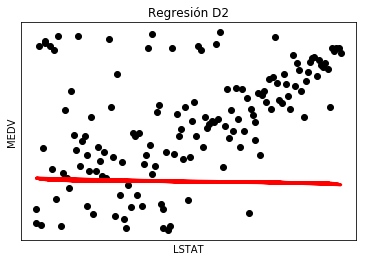

Coefficients: 
 [[-0.89682685]]
Mean squared error: 48.45
Variance score: 0.53


In [144]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

D2trainX =D2train[['LSTAT']]
D2trainY =D2train[['MEDV']]
D2testX =D2test[['LSTAT']]
D2testY =D2test[['MEDV']]

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(D2trainX,D2trainY)
 
# Plot outputs
plt.scatter(D1testX, D1testY,  color='black')
plt.title('Regresión D2')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.xticks(())
plt.yticks(())
plt.plot(D1testX, regr.predict(D1testX), color='red',linewidth=3)
plt.show()

D2predY = regr.predict(D2testX)
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(D2testY, D2predY))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(D2testY, D2predY))


Tiene un mejor ajuste la Regresión realizada con el subset D1, así las cosas
se infiere que es mejor predictor del MEDV el RM que el LSTAT dado que el MSE
es mas bajo.

# 4.5 Training a regression model

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
newdata=df
newdata.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [159]:
pf = pd.DataFrame(np.random.randn(506, 2))
msk = np.random.rand(len(newdata)) < 0.7
newdatatrain = newdata[msk]
newdatatest =newdata[~msk]

In [160]:
print(newdatatrain.shape)
print(newdatatest.shape)

(349, 14)
(157, 14)


In [161]:
X_train=newdatatrain.iloc[:,0:13]
Y_train=newdatatrain['MEDV']

In [162]:
X_test=newdatatest.iloc[:,0:13]
Y_test=newdatatest['MEDV']

In [168]:
modelo = linear_model.LinearRegression()
modelo.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [169]:
print(modelo.coef_)

[-8.89700333e-02  5.08942913e-02  2.60466213e-02  3.89542104e+00
 -1.09760868e+01  3.74087849e+00 -9.75323412e-03 -1.47080265e+00
  2.45854614e-01 -1.01242343e-02 -8.56296568e-01  1.29289301e-02
 -5.95734943e-01]


In [176]:
pred_modelo=modelo.predict(X_test)

In [192]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, pred_modelo))

Mean squared error: 30.31


Train a regression model using MLPRegressor in order to predict the output variable MEDV.

In [178]:
from sklearn.neural_network import MLPRegressor
modelo_MLP=MLPRegressor(hidden_layer_sizes=(10,10,8))
modelo_MLP.fit(X_train,Y_train)

C:\Users\camil\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [179]:
prediction_MLP=modelo_MLP.predict(X_test)

In [190]:
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test, prediction_MLP))


Mean squared error: 58.70


Scale the data so they have zero mean variance one per feature (only X). You can use the following piece of code:

In [182]:
newdata.iloc[0:5,0:13]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [183]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_x.fit(newdata.iloc[:,0:13])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [186]:
XtrainC = sc_x.transform(X_train)
XtestC = sc_x.transform(X_test)

Train a linear regression model using the scaled data.

In [188]:
Cmodel = linear_model.LinearRegression()
Cmodel.fit(XtrainC,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [196]:
predCmodel=Cmodel.predict(XtestC)
print("Mean squared error: %.2f"
      % mean_squared_error(Y_test,predCmodel))

Mean squared error: 30.31
